In [2]:
# importing several required libraries used for analysis of the given csv data


import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

from keras.models import Sequential
from keras.layers import LSTM,Dropout, Dense

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
# importing csv file of tesla stock data and importing 11 columns 
# in this data it is given opening and closing of the price of shares of Tesla company

import pandas as pd
df = pd.read_csv(r"C:\Users\91999\Downloads\archive.zip")
df.head(11)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
5,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
6,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000
7,2010-07-09,3.516,3.580,3.310,3.480,3.480,20253000
8,2010-07-12,3.590,3.614,3.400,3.410,3.410,11012500
9,2010-07-13,3.478,3.728,3.380,3.628,3.628,13400500


In [4]:
# Here .columns function is used to print name of columns

df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
# .describe() : this function is used to give values of various mathematical terms which are useful for visualizing and 
# understanding data

df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,138.691296,141.771603,135.425953,138.762183,138.762183,3.131449e+07
std,250.044839,255.863239,243.774157,250.123115,250.123115,2.798383e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,19.627000,20.402000,19.127500,19.615000,19.615000,1.310288e+07
50%,46.656999,47.487001,45.820002,46.545000,46.545000,2.488680e+07
75%,68.057001,69.357500,66.911501,68.103998,68.103998,3.973875e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


In [6]:
# .info() : this function is used to tell non null count and data type in which data is given 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


In [7]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
# this function is used to give info about shape of data that means number of rows and columns

df.shape

(2956, 7)

In [9]:
df[1:]

,Date,Open,High,Low,Close,Adj Close,Volume
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
5,2010-07-07,3.280000,3.326000,2.996000,3.160000,3.160000,34608500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [10]:
df.shape

(2956, 7)

In [11]:
print(df)

            Date         Open         High         Low        Close  \
0     2010-06-29     3.800000     5.000000    3.508000     4.778000   
1     2010-06-30     5.158000     6.084000    4.660000     4.766000   
2     2010-07-01     5.000000     5.184000    4.054000     4.392000   
3     2010-07-02     4.600000     4.620000    3.742000     3.840000   
4     2010-07-06     4.000000     4.000000    3.166000     3.222000   
...          ...          ...          ...         ...          ...   
2951  2022-03-18   874.489990   907.849976  867.390015   905.390015   
2952  2022-03-21   914.979980   942.849976  907.090027   921.159973   
2953  2022-03-22   930.000000   997.859985  921.750000   993.979980   
2954  2022-03-23   979.940002  1040.699951  976.400024   999.109985   
2955  2022-03-24  1009.729980  1024.489990  988.799988  1013.919983   

        Adj Close    Volume  
0        4.778000  93831500  
1        4.766000  85935500  
2        4.392000  41094000  
3        3.840000  25699000

In [12]:
# this line of code takes the 'Date' column in dataframe and converts it's value from string to datetime objects

import pandas as pd
Date = ['2010-06-29', '2023-10-02', '2023-10-03']
df = pd.DataFrame({'Date': Date})
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
# here we calculated number of days for which price of stock goes up and down

print(f'Dataframe contains stock prices between {df["Date"].min()} and {df["Date"].max()}')
print(f'Total days = {(df["Date"].max() - df["Date"].min()).days} days')

Dataframe contains stock prices between 2010-06-29 00:00:00 and 2023-10-03 00:00:00
Total days = 4844 days


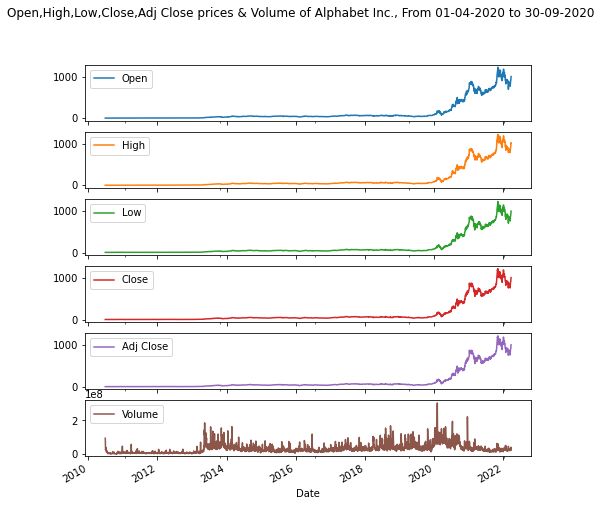

In [14]:
# reads a CSV file containing stock data, filters it based on a specified date range, and then creates subplots to visualize various stock metrics over time using Matplotlib.
#  The resulting plot shows the Open, High, Low, Close, Adj Close prices, and Volume of Alphabet Inc. for a specific date range.


import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\91999\Downloads\archive.zip")
start_date = pd.to_datetime('2010-06-29')
end_date = pd.to_datetime('2023-10-03')                         
df['Date'] = pd.to_datetime(df['Date']) 
new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
df1 = df.loc[new_df]
stock_data = df1.set_index('Date')
stock_data.plot(subplots = True, figsize = (8, 8));
plt.legend(loc = 'best')
plt.suptitle('Open,High,Low,Close,Adj Close prices & Volume of Alphabet Inc., From 01-04-2020 to 30-09-2020', fontsize=12, color='black')
plt.show()


In [15]:
# here i have made a line plot to visualize the stock prices over time


import plotly.graph_objects as go
import pandas as pd




layout = go.Layout(
    title='Stock prices of Tesla company',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

df_data = [{'x': df['Date'], 'y': df['Close']}]
plot = go.Figure(data=df_data, layout=layout)
plot.show()



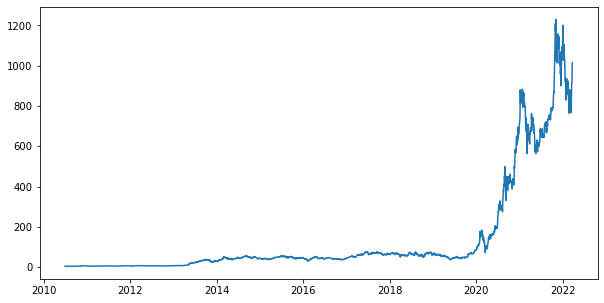

In [16]:
# here i have visualized the graph of closing prices of stock versus date or time we can say

df['Date'] = pd.to_datetime(df.Date, format = "%Y-%m-%d")
df.index = df['Date']
plt.figure(figsize=(10,5))
plt.plot(df['Close'])

In [17]:
# here i have developed a training machine learning model 
# it sorts the data, creates a new DataFrame, scales the data, and generates input-output pairs for training the model

# sorting the data
data = df.sort_index(ascending=True, axis=0)
new_dataset = pd.DataFrame(index=range(0,len(df)), columns = ['Date', 'Close'])

days = 60

for i in range(0, len(data)):
    new_dataset['Date'][i] = data['Date'][i]
    new_dataset['Close'][i] = data['Close'][i]
    
new_dataset.index = new_dataset.Date
new_dataset.drop('Date', axis=1, inplace=True)

final_dataset=new_dataset.values
train_data = final_dataset[0:1500,:]
valid_data = final_dataset[1500:,:]

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(final_dataset)

x_train_data, y_train_data = [], []
for i in range(days, len(train_data)):
    x_train_data.append(scaled_data[i-days:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)
x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1],1 ))

In [18]:
# here i have developed a LSTM neural network model 
#  The model is trained using mean squared error as the loss function and the Adam optimizer

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape= (x_train_data.shape[1],1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

lstm_model.compile(loss="mean_squared_error", optimizer='adam')
lstm_model.fit(x_train_data, y_train_data, epochs=4, batch_size=16, verbose=2)


Epoch 1/4
90/90 - 3s - loss: 5.1125e-05 - 3s/epoch - 31ms/step
Epoch 2/4
90/90 - 1s - loss: 7.8978e-06 - 1s/epoch - 14ms/step
Epoch 3/4
90/90 - 1s - loss: 7.4182e-06 - 1s/epoch - 14ms/step
Epoch 4/4
90/90 - 1s - loss: 6.6024e-06 - 1s/epoch - 16ms/step


In [19]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


C:\Users\91999\AppData\Local\Temp/ipykernel_12340/3876253534.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



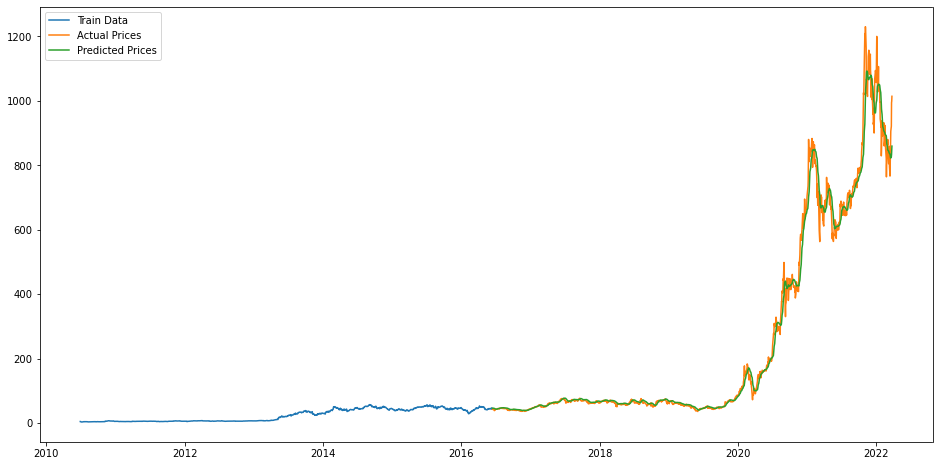

In [20]:
# here i have created a plot  to visualize the training data, actual prices in the validation set, and the predicted prices
# it prepares input data for prediction, makes predictions, inversely scales the predictions, saves the trained model


import matplotlib.pyplot as plt

inputs_data = new_dataset[len(new_dataset) - len(valid_data) - 60:].values
inputs_data = inputs_data.reshape(-1, 1)
inputs_data = scaler.transform(inputs_data)

x_test = []
for i in range(days, inputs_data.shape[0]):
    x_test.append(inputs_data[i - days:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

closing_price = lstm_model.predict(x_test)
closing_price = scaler.inverse_transform(closing_price)


lstm_model.save("saved_lstm_model.h5")


train_data = new_dataset.iloc[:1500]
valid_data = new_dataset.iloc[1500:]
valid_data['Predictions'] = closing_price


plt.figure(figsize=(16, 8))
plt.plot(train_data.index, train_data["Close"], label="Train Data")
plt.plot(valid_data.index, valid_data["Close"], label="Actual Prices")
plt.plot(valid_data.index, valid_data["Predictions"], label="Predicted Prices")
plt.legend()
plt.show()


In [ ]:
# CONCLUSION :
#        in November 2021 price of Tesla stockes were at their highest in the given data. 